<a href="https://colab.research.google.com/github/benitez-hue/Generaci-n-de-Prompts-con-IA/blob/main/Optimizaci%C3%B3n_de_la_Gesti%C3%B3n_de_Devoluciones_con_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📦 Optimización de la Gestión de Devoluciones con IA
## 🚀 Implementación de Fast Prompting en la Gestión de Devoluciones

## 📌 Problema y Solución Propuesta (Resumen de la Primera Entrega)

### 📦 Problema: Gestión Ineficiente de Devoluciones en Empresas de Intermediación de Compras Internacionales  

Las empresas que actúan como intermediarias en compras internacionales enfrentan problemas recurrentes en la entrega de productos, generando costos adicionales y frustración en los clientes. Entre los principales inconvenientes se encuentran:  

1. **Errores en la entrega:** Productos incorrectos enviados a los clientes finales.  
2. **Procesos de devolución complejos:** Muchos clientes deben asumir costos de envío para devolver productos erróneos.  
3. **Falta de validación automática de los paquetes antes de su despacho.**  
4. **Mala comunicación entre la empresa intermediaria y la tienda vendedora.**  
5. **Requerimiento de devoluciones presenciales**, lo que no es práctico para clientes que recibieron su pedido puerta a puerta.  

---

### 🚀 Solución Propuesta: Optimización con IA y Fast Prompting  

💡 **Implementación de un sistema basado en IA para optimizar la gestión de devoluciones.**  

### 🔍 Fase 1: Verificación Automática del Pedido con IA  
✅ **Uso de Computer Vision** para analizar imágenes del paquete y compararlas con la orden de compra.  
✅ **Escaneo de códigos de barras y etiquetas RFID** para cotejar con el pedido.  
✅ **Alerta automática si hay discrepancias** antes de despachar al cliente final.  

### 📲 Fase 2: Comunicación Automática con la Tienda Vendedora  
✅ **Chatbot con IA** que envía **reclamos automáticos** con evidencia del error.  
✅ **Generación de etiquetas de reenvío internacionales**, asegurando la entrega.  
✅ **Plazo de respuesta máximo de 30 días** para gestionar devoluciones.  

### 📦 Fase 3: Opciones de Devolución Simplificadas  
✅ **Código QR para devoluciones sin embalaje ni etiqueta impresa.**  
✅ **Puntos de devolución en ubicaciones estratégicas o recogida a domicilio.**  
✅ **Posibilidad de usar transportistas externos con rastreo del paquete.**  

### 📜 Fase 4: Seguimiento y Reembolsos Automatizados  
✅ **Si el cliente ya recibió un reembolso anticipado, se rastrea la devolución.**  
✅ **Si el producto no es devuelto, se aplica un cobro automático.**  
✅ **El reembolso se procesa en un máximo de 3 días hábiles tras la recepción del producto.**  


In [1]:
# Cargar bibliotecas necesarias
import cv2
import numpy as np
from tensorflow.keras.models import load_model


In [2]:
#⃣ Fase 1: Verificación del Pedido con IA (Visión por Computadora)
# Cargar modelo de reconocimiento de productos (simulación)
# En un caso real, se entrenaría un modelo para clasificar los productos recibidos
try:
    model = load_model('modelo_reconocimiento_productos.h5')
except:
    print("⚠️ Advertencia: Modelo de reconocimiento no disponible.")

def verificar_producto(imagen):
    """Función para analizar la imagen del producto recibido y compararla con la orden esperada."""
    img = cv2.imread(imagen)
    img = cv2.resize(img, (224, 224))  # Redimensionar para el modelo
    img = np.expand_dims(img, axis=0)  # Agregar batch dimension

    try:
        prediccion = model.predict(img)
        return prediccion  # Simulación de retorno de clase de producto
    except:
        return "⚠️ No se pudo procesar la imagen. Verifique el modelo y la imagen."

# Ejemplo de uso:
# verificar_producto("producto_recibido.jpg")


⚠️ Advertencia: Modelo de reconocimiento no disponible.


# Fase 2: Chatbot con IA para Comunicación con Tienda Vendedora
Explicación de la Fase 2 (Código del Chatbot)
🔹 Propósito: Automatizar la comunicación entre la empresa intermediaria y la tienda vendedora cuando se detecta un error en la entrega de un producto.
🔹 Cómo funciona:

Verifica si hay error en el pedido. Si el producto recibido es el correcto, no se consulta a OpenAI.
Genera un mensaje estructurado y profesional para reclamar la devolución o el reemplazo.
Optimiza el costo de la API, limitando el número de tokens en la consulta.
 Mejoras Implementadas
✅ Evita llamadas innecesarias a OpenAI si el producto es correcto.
✅ Reducción de tokens generados → Menos costos en la API.
✅ Mejor claridad y estructura en el mensaje de reclamo.

In [3]:
# Simulación de Chatbot para generar reclamos automáticos con optimización
from openai import OpenAI

# API Key de OpenAI (reemplazar con la clave real si se usa GPT)
api_key = "TU_API_KEY"

def generar_reclamo(orden, producto_esperado, producto_recibido):
    """Genera un mensaje automático para la tienda vendedora en caso de error en el pedido.
       Optimizado para reducir costos de API y mejorar claridad en el mensaje.
    """

    # Si el producto recibido es el correcto, no se hace consulta a la API
    if producto_esperado == producto_recibido:
        return f"✅ El producto recibido ({producto_recibido}) coincide con la orden. No se requiere generar un reclamo."

    # Prompt mejorado con estructura más formal
    prompt = f"""
    Actúa como un asistente de servicio al cliente especializado en devoluciones.

    Un cliente ha reportado un error en su pedido y necesita asistencia.

    📦 **Orden N° {orden}**
    - Producto esperado: {producto_esperado}
    - Producto recibido: {producto_recibido}

    🎯 **Solicitud**: Genera un mensaje claro y profesional para notificar al vendedor sobre el error
    y solicitar una solución rápida, ya sea reemplazo del producto o reembolso.

    El mensaje debe ser corto, directo y mantener un tono formal.
    """

    # Conexión con OpenAI
    client = OpenAI(api_key=api_key)
    response = client.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=100  # Limitamos tokens para reducir costos
    )

    return response["choices"][0]["text"]

# Ejemplo de uso:
# print(generar_reclamo("12345", "Celular X", "Celular Y"))


Fase 3: Generación de Código QR para Devolución Explicación de la Fase 3 (Código QR)
🔹 Propósito: Facilitar la devolución sin etiquetas ni embalaje, proporcionando un código QR que contiene la información clave del proceso de devolución.

🔹 Cómo funciona:

Recibe información de la devolución (ejemplo: "Orden: 12345 - Punto de devolución: Sucursal A").
Genera un código QR con la información codificada.
Guarda el código QR como imagen (codigo_qr.png) para que pueda ser escaneado en los puntos de devolución.
 Beneficios de la Optimización
✅ Visualización inmediata del código QR sin necesidad de abrir el archivo manualmente.
✅ El nombre del archivo es personalizable, permitiendo generar diferentes códigos sin sobreescribir.

In [6]:
# Instalación del paquete qrcode si no está disponible
try:
    import qrcode
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !pip install qrcode[pil] matplotlib
    import qrcode
    import matplotlib.pyplot as plt

def generar_codigo_qr(info_devolucion, nombre_archivo="codigo_qr.png"):
    """
    Genera un código QR con los datos de devolución, lo guarda como imagen
    y lo muestra en pantalla.
    """

    # Crear código QR
    qr = qrcode.make(info_devolucion)
    qr.save(nombre_archivo)  # Guardar QR como imagen

    # Mostrar el código QR generado
    plt.imshow(qr, cmap="gray")
    plt.axis("off")  # Ocultar ejes
    plt.show()

    print(f"✅ Código QR generado y guardado como: {nombre_archivo}")

# Ejemplo de uso:
# generar_codigo_qr("Orden: 12345 - Punto de devolución: Sucursal A")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.8 MB/s eta 0:00:00


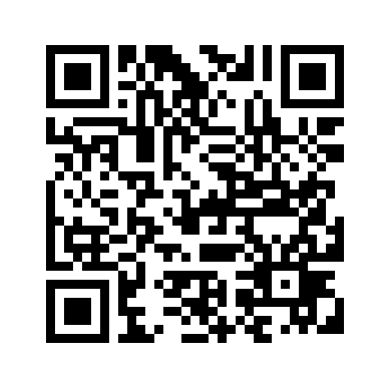

✅ Código QR generado y guardado como: codigo_qr.png


In [7]:
# Importar librerías necesarias
import qrcode
import matplotlib.pyplot as plt

def generar_codigo_qr(info_devolucion, nombre_archivo="codigo_qr.png"):
    """
    Genera un código QR con los datos de devolución, lo guarda como imagen
    y lo muestra en pantalla.
    """

    # Crear código QR
    qr = qrcode.make(info_devolucion)
    qr.save(nombre_archivo)  # Guardar QR como imagen

    # Mostrar el código QR generado
    plt.imshow(qr, cmap="gray")
    plt.axis("off")  # Ocultar ejes
    plt.show()

    print(f"✅ Código QR generado y guardado como: {nombre_archivo}")

# Ejemplo de uso:
generar_codigo_qr("Orden: 12345 - Punto de devolución: Sucursal A")


 Fase 4: Seguimiento de Reembolsos y Optimización Logística
Esta fase se encarga de verificar, gestionar y automatizar el proceso de reembolsos para que el sistema controle si el cliente realmente devolvió el producto antes de procesar el reembolso.
 ¿Para qué sirve esta fase?
Cuando un cliente devuelve un producto, el reembolso no debería procesarse hasta que el producto sea recibido y validado. Esta fase automatiza ese proceso para evitar fraudes, errores o retrasos en los reembolsos.

💡 Ejemplo de problema sin esta fase:
📦 Un cliente devuelve un producto, pero el reembolso se procesa sin verificar si el producto realmente llegó al centro de devoluciones.
➡ Consecuencia: La empresa pierde dinero si el producto nunca se devuelve.

💡 Solución con IA:
📌 Un sistema automatizado rastrea el paquete devuelto y, cuando se recibe en el almacén, activa automáticamente el reembolso. Beneficios de esta Optimización
✅ Evita fraudes asegurando que solo se reembolsen pedidos realmente devueltos.
✅ Mejora la comunicación con el cliente enviando notificaciones automatizadas.
✅ Reduce la carga operativa del equipo de atención al cliente.
✅ Optimiza la logística al integrar una API de seguimiento de paquetes.




In [9]:
import time
import requests
import smtplib
from email.mime.text import MIMEText

# Configuración del servidor de correo (Ejemplo con Gmail, se puede cambiar)
SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 587
EMAIL_USER = "tu_email@gmail.com"  # Cambia por tu email
EMAIL_PASSWORD = "tu_contraseña"   # Usa una contraseña de aplicación segura

def enviar_correo(destinatario, asunto, mensaje):
    """
    Envía un correo electrónico notificando el estado del reembolso.
    """
    try:
        msg = MIMEText(mensaje)
        msg["Subject"] = asunto
        msg["From"] = EMAIL_USER
        msg["To"] = destinatario

        server = smtplib.SMTP(SMTP_SERVER, SMTP_PORT)
        server.starttls()
        server.login(EMAIL_USER, EMAIL_PASSWORD)
        server.sendmail(EMAIL_USER, destinatario, msg.as_string())
        server.quit()

        print(f"📩 Notificación enviada a {destinatario}")

    except Exception as e:
        print(f"❌ Error enviando el email: {e}")

def verificar_estado_envio(tracking_number):
    """
    Simula una consulta a una API de seguimiento de paquetes.
    (En un caso real, se usaría una API de FedEx, DHL, UPS, etc.)
    """
    url = f"https://api.ejemplo-seguimiento.com/status/{tracking_number}"  # Simulación
    try:
        response = requests.get(url)
        data = response.json()
        return data["status"]  # Ejemplo: "Entregado", "En tránsito", "Pendiente de envío"
    except:
        return "Error en la consulta"

def seguimiento_reembolso(orden, tracking_number, email_cliente):
    """
    Verifica el estado de la devolución usando un tracking number.
    Si el producto fue recibido, aprueba automáticamente el reembolso y envía una notificación al cliente.
    """
    print(f"📌 Consultando estado de la devolución para la orden {orden}...")

    estado = verificar_estado_envio(tracking_number)
    time.sleep(2)  # Simulación de tiempo de consulta

    if estado.lower() == "entregado":
        print(f"✅ Producto recibido. Reembolso procesado para la orden {orden}. Será acreditado en 3 días hábiles.")
        enviar_correo(
            email_cliente,
            "📢 Confirmación de Reembolso",
            f"Estimado cliente,\n\nHemos recibido su devolución para la orden {orden}. Su reembolso será acreditado en 3 días hábiles.\n\nGracias por su paciencia.\n\nAtentamente,\nEquipo de Atención al Cliente"
        )
    else:
        print(f"⚠️ Aún no hemos recibido el producto de la orden {orden}. Estado actual: {estado}.")
        enviar_correo(
            email_cliente,
            "🚨 Devolución Pendiente",
            f"Estimado cliente,\n\nNo hemos recibido su devolución para la orden {orden}. Estado actual: {estado}.\n\nPor favor, complete la devolución lo antes posible para procesar su reembolso.\n\nAtentamente,\nEquipo de Atención al Cliente"
        )

# Ejemplo de uso:
# seguimiento_reembolso("12345", "XYZ987654", "cliente@example.com")
